<a href="https://colab.research.google.com/github/yashyaks/compute_tasks/blob/main/Lab_2/Lab2.2_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Loading the Dataset

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/yashyaks/compute_tasks/main/Lab_2/iris.csv")

# Basic EDA

In [35]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [37]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


<AxesSubplot:xlabel='species', ylabel='count'>

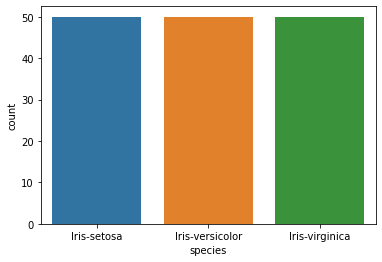

In [38]:
x = df.value_counts("species")
print(x)
sns.countplot(x=df["species"])

In [39]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['species_num'] = label_encoder.fit_transform(df['species'])


<AxesSubplot:>

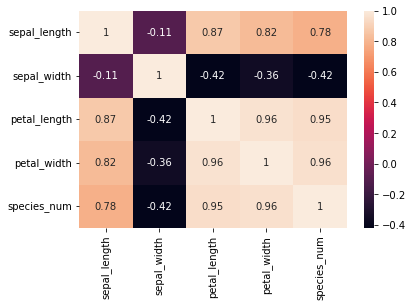

In [40]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [41]:
df_features = df[['sepal_length', 'sepal_width', "petal_length", "petal_width"]]
df_target = df[["species"]]
print(df_target)

            species
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2,random_state = 101)

In [43]:
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [46]:
# Train Decision Tree Classifer
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
#Predict the response for test dataset
y_pred_test = classifier.predict(x_test)

In [50]:
from sklearn import metrics

score = metrics.accuracy_score(y_pred_test,y_test)
print(score)

0.9666666666666667


In [58]:
from sklearn import metrics

#create confusion matrix
c_matrix = metrics.confusion_matrix(y_test, y_pred_test)

#print confusion matrix
print(c_matrix)

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]


In [52]:
from sklearn import metrics

classification_report = metrics.classification_report(y_pred_test,y_test)
print(classification_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

